#### Discente: Jaqueline Donin Noleto

#### Matrícula: 20160144455



In [1]:
#bibliotecas
from __future__ import division
from sympy import *
import sympy as sp
import numpy as np
import csv
import pandas as pd
import matplotlib
from math import log, ceil
import math
from PIL import Image


## Questão 1

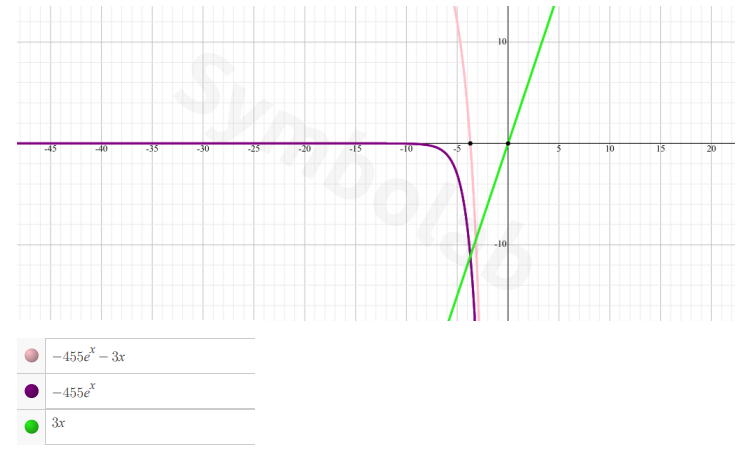

In [2]:
#exibir a imagem do gráfico
img = Image.open("graph0.png")
img

Os intervalos utilizados nos métodos foram escolhidos de acordo com o gráfico acima. A partir da interseção da reta roxa e verde projetada no eixo das abcissas podemos perceber que existe uma raíz antes do valor menos cinco. E esta hiṕtese é confirmada pois a reta rosa que representa a função original, cruza o eixo x exatamento no ponto onde onde as duas retas se cruzam. Se aproximarmos o gráfico podemos identificar melhor onde a raiz está localizada, como mostra a figura abaixo.

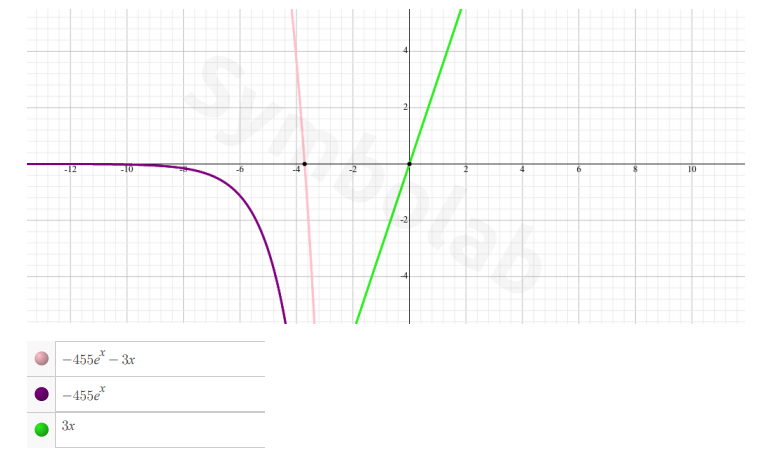

In [3]:
#exibir a imagem do gráfico
img = Image.open("graph1.png")
img

A partir da análise do gráfico podemos identificar que o intervalo -4 e -3 é um bom intervalo para ser usado como ponto de partida para os métodos abaixo. Apenas como confirmação vamos aplicar a derida nos dois pontos e verificar se existe de fato apenas uma raíz neste intervalo.


In [4]:
def  derivada1 ( x ): 
    return  ((-455)*math.exp(x) - (3) )

print("Derivada de -4 = ",derivada1(-4))
print("Derivada de -3 = ",derivada1(-3))


Derivada de -4 =  -11.333615694374052
Derivada de -3 =  -25.653116107378096


Não há mudança de sinal entre as derivadas, portanto, sabemos que neste intervalo existe apenas uma raiz real.

### Letra A Bissecção

In [5]:
def f(x):
    #insere a função utilizada
    return (-455)*math.exp(x) - (3*x) 
def bissetion (a, b, f, tol):
    #contagem de numero de iterações
    k = 0
    #CALCULA O ERRO DO INTERVALO 
    erro = abs((b-a))
    
    ### ESCREVE NO ARQUIVO CSV
    file = open('bs.csv', 'w', newline='')

    with file:
    
        fnames = ['k','a','b','m','f_a','f_b','f_m','b-a']
        writer = csv.DictWriter(file, fieldnames=fnames)
        writer.writeheader()
        #LAÇO PARA ITERAÇÃO DO ALGORITMO
        while(erro >= tol):
            #absoluto do erro
            erro = abs((b - a))
            #calcula o novo ponto
            m = (a + b)/2
            #valor do erro
            e = b-a
            #escreve no arquivo
            writer.writerow({'k': k, 'a': a, 'b': b, 'm': m, 'f_a': 
                             f(a), 'f_b': f(b), 'f_m': f(m), 'b-a': e})
            #analisa se há mudança de sinal entre os valores do ponto 'a' e o novo valor aplicado a função
            if(f(m)*f(a) >= 0):
                a = m
            #caso contrário
            else:
                b = m

            k = k+1
#chama a função            
bissetion(-4, -3,f, 0.0001  )
#exibe os valores
pd.read_csv('bs.csv')


,k,a,b,m,f_a,f_b,f_m,b-a
0,0,-4.000000,-3.000000,-3.500000,3.666384,-13.653116,-3.239809,1.000000
1,1,-4.000000,-3.500000,-3.750000,3.666384,-3.239809,0.549426,0.500000
2,2,-3.750000,-3.500000,-3.625000,0.549426,-3.239809,-1.250339,0.250000
3,3,-3.750000,-3.625000,-3.687500,0.549426,-1.250339,-0.328202,0.125000
4,4,-3.750000,-3.687500,-3.718750,0.549426,-0.328202,0.116003,0.062500
5,5,-3.718750,-3.687500,-3.703125,0.116003,-0.328202,-0.104731,0.031250
6,6,-3.718750,-3.703125,-3.710938,0.116003,-0.104731,0.005976,0.015625
7,7,-3.710938,-3.703125,-3.707031,0.005976,-0.104731,-0.049292,0.007812
8,8,-3.710938,-3.707031,-3.708984,0.005976,-0.049292,-0.021637,0.003906
9,9,-3.710938,-3.708984,-3.709961,0.005976,-0.021637,-0.007825,0.001953


### Letra B Newton-Raphson

In [6]:
#calcula a função no ponto
def  funcao ( x ): 
    return  ((-455)*math.exp(x) - (3*x) )
#calcula a função da derivada aplicada ao ponto
def  derivada ( x ): 
    return  ((-455)*math.exp(x) - (3) )
def metodo_newton(a, c, tol,funcao ):
    error = 1
    b=0
    aux=0
    #média do intervalo inicial
    a = (a+c)/2
    #abre arquivo
    file = open('nr.cvs', 'w', newline='')
    with file: 
        fdata = ['x_k','fx_k','dx_k-1', 'x_k - x_k-1']
        writer = csv.DictWriter(file, fieldnames=fdata)
        writer.writeheader() 
        print("\n")
        #laço para calculo das iterações
        while error > tol:
            #aplica a derivada
            aux_deri= derivada(a) 
            #calcula o novo ponto
            b = a - funcao(a)/derivada(a)
            #calcula a função no novo ponto
            f = funcao(b)
            #calcula o erro
            dr = b-a
            #atribui o novo valor calculado
            a=b
            #calculo o valor absoluto do erro
            error = abs(dr)
            #escreve no arquivo
            writer.writerow({'x_k': a,'fx_k':f , 'dx_k-1': 
                             aux_deri, 'x_k - x_k-1': error})
    
#chama a função
metodo_newton(-4,-3,10**(-4), funcao)
#exibe os valores
pd.read_csv('nr.cvs')

,x_k,fx_k,dx_k-1,x_k - x_k-1
0,-3.693539,-2.415010e-01,-16.739809,1.935392e-01
1,-3.710401,-1.600602e-03,-14.322119,1.686210e-02
2,-3.710515,-7.139507e-08,-14.132805,1.132544e-04
3,-3.710515,0.000000e+00,-14.131544,5.052178e-09


### Letra C:  Secante

In [7]:
#calcula a função no ponto
def  funcao ( x ): 
    return  ((-455)*math.exp(x) - (3*x))
def metodo_secante(a,b,tol):
    error = (tol+0.01)
    c=0
    aux=0
    #abre arquivo para salvar os valores calculados
    file = open('sc.cvs', 'w', newline='')
    with file: 
        fdata = ['x_1','x_2','x_3','f_x1', 'f_x2', 'f_x3', 'erro']
        writer = csv.DictWriter(file, fieldnames=fdata)
        writer.writeheader() 
        print("\n")
        #laço para calculo das iterações
        while error > tol:
            #calcula a nova aproximação 
            c = b - funcao(b)*((a-b) / (funcao(a)-funcao(b)))
            #descarta o valor mais antigo
            a = b
            #recebe o valor mais atual
            b = c
            #calcula o erro
            error = abs(funcao(c))
            #escreve no arquivo
            writer.writerow({'x_1': a,'x_2':b , 'x_3': c, 'f_x1': funcao(a), 'f_x2':  
                             funcao(b), 'f_x3':  funcao(c), 'erro': error})

#chama a função
metodo_secante(-3, -4,10**(-4) )
#exibe os valores
pd.read_csv('sc.cvs')

,x_1,x_2,x_3,f_x1,f_x2,f_x3,erro
0,-4.000000,-3.788309,-3.788309,3.666384,1.066527,1.066527,1.066527
1,-3.788309,-3.701468,-3.701468,1.066527,-0.128301,-0.128301,0.128301
2,-3.701468,-3.710793,-3.710793,-0.128301,0.003932,0.003932,0.003932
3,-3.710793,-3.710516,-3.710516,0.003932,0.000014,0.000014,0.000014


### letra D
Podemos perceber que os métodos de Newton-Raphson e da secante convergem mais rapidamente para o valor da raíz de acordo com a precisão estipulada. Porém o critério de parada é diferente nesses dois métodos em relação a bissecção. Na bissecção utilizamos a diferença do intervalo, e nos dois outros o valor absoluto da função, porém este não é o fator principal que faz com que estes dois métodos sejam melhores, na verdade o valor de convergência deles é maior, isso explica a diferença da quantidade de iterações necessárias em cada um.

## Questão 2

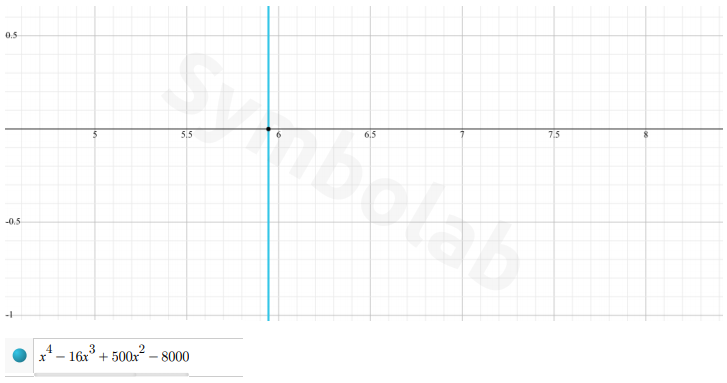

In [8]:
#exibir a imagem do gráfico
img = Image.open("graph4.png")
img

A partir do gráfico acima podemos analizar e encontrar o intervalo onde encontra-se uma raíz para a função. Neste caso, entre 5,5 e 6.Vamos aplicar os pontos na derivada da função e ver como ela se comporta.

In [9]:
def  derivada2 ( x ): 
    return  (4*x**3 - 48*x**2 + 1000*x - 8000 )

print("Derivada de 5,5 = ",derivada2(5.5))
print("Derivada de 6 = ",derivada2(6))

Derivada de 5,5 =  -3286.5
Derivada de 6 =  -2864


Não há mudança de sinal, portanto, existe apenas uma raíz neste intervalo.

#### Método de Newton-Raphson

In [10]:
#calcula a função no ponto
def  funcao ( x ): 
    return  (x**4 - 16*x**3 + 500*x**2 - 8000*x + 32000 )
#calcula a função da derivada aplicada ao ponto
def  derivada ( x ): 
    return  (4*x**3 - 48*x**2 + 1000*x - 8000 )
def metodo_newton(a, c, tol):
    error = 1
    b=0
    aux=0
    #média do intervalo inicial
    a = (a+c)/2
    #abre arquivo
    file = open('mn2.cvs', 'w', newline='')
    with file: 
        fdata = ['x_k','fx_k','dx_k-1', 'x_k - x_k-1']
        writer = csv.DictWriter(file, fieldnames=fdata)
        writer.writeheader() 
        print("\n")
        #laço para calculo das iterações
        while error > tol:
            #aplica a derivada
            aux_deri= derivada(a) 
            #calcula o novo ponto
            b = a - funcao(a)/derivada(a)
            #calcula a função no novo ponto
            f = funcao(b)
            #calcula o erro
            dr = b-a
            #atribui o novo valor calculado
            a=b
            #calculo o valor absoluto do erro
            error = abs(dr)
            #escreve no arquivo
            writer.writerow({'x_k': a,'fx_k':f , 'dx_k-1': aux_deri, 'x_k - x_k-1': error})
        return a
#chama a função
num = metodo_newton(-4,-3,10**(-5))
#exibe os valores
pd.read_csv('mn2.cvs')

,x_k,fx_k,dx_k-1,x_k - x_k-1
0,1.961973,1.812286e+04,-12259.500000,5.461973e+00
1,4.888516,3.542583e+03,-6192.585722,2.926542e+00
2,5.822920,3.605347e+02,-3791.273638,9.344044e-01
3,5.942506,6.075363e+00,-3014.850133,1.195863e-01
4,5.944592,1.855671e-03,-2913.136079,2.085506e-03
5,5.944592,1.746230e-10,-2911.356457,6.373904e-07


In [11]:
print("valor de x com a aproximação pelo método de Newton-Raphson")
valor = 400 - num**2
print("x=", math.sqrt(valor))

valor de x com a aproximação pelo método de Newton-Raphson
x= 19.096120582363458


#### Método da secante

In [12]:
#calcula a função no ponto
def  funcao ( x ): 
    return  ((x**4 - 16*x**3 + 500*x**2 - 8000*x + 32000 ))
def metodo_secante(a,b,tol):
    error = (tol+0.01)
    c=0
    aux=0
    #abre arquivo para salvar os valores calculados
    file = open('sc2.cvs', 'w', newline='')
    with file: 
        fdata = ['x_1','x_2','x_3','f_x1', 'f_x2', 'f_x3', 'erro']
        writer = csv.DictWriter(file, fieldnames=fdata)
        writer.writeheader() 
        print("\n")
        #laço para calculo das iterações
        while error > tol:
            #calcula a nova aproximação 
            c = b - funcao(b)*((a-b) / (funcao(a)-funcao(b)))
            #descarta o valor mais antigo
            a = b
            #recebe o valor mais atual
            b = c
            #calcula o erro
            error = abs(funcao(c))
            #escreve no arquivo
            writer.writerow({'x_1': a,'x_2':b , 'x_3': c, 'f_x1': funcao(a), 'f_x2':  
                             funcao(b), 'f_x3':  funcao(c), 'erro': error})
        return c
#chama a função
num= metodo_secante(5.5, 6,10**(-5) )
#exibe os valores
pd.read_csv('sc2.cvs')

,x_1,x_2,x_3,f_x1,f_x2,f_x3,erro
0,6.000000,5.947987,5.947987,-160.000000,-9.876568e+00,-9.876568e+00,9.876568e+00
1,5.947987,5.944565,5.944565,-9.876568,8.102901e-02,8.102901e-02,8.102901e-02
2,5.944565,5.944592,5.944592,0.081029,-4.032945e-05,-4.032945e-05,4.032945e-05
3,5.944592,5.944592,5.944592,-0.000040,-1.673470e-10,-1.673470e-10,1.673470e-10


In [13]:
print("valor de x com a aproximação pelo método da secante")
valor = 400 - num**2
print("x=", math.sqrt(valor))

valor de x com a aproximação pelo método da secante
x= 19.096120582363422
